In [15]:
import xml.etree.ElementTree as ET
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

import math 
import statistics

from ROOT import TCanvas, TH1F, TGraph, gROOT
from array import array
from shapely.geometry import Polygon

import pprint
import re


# Input padplane mapping

In [16]:
#map='PadPlane/AutoPad-R1-RevA.sch'
#map='PadPlane/AutoPad-R2-RevA-Pads.sch'
#map='PadPlane/AutoPad-R3-RevA.sch'
maps = [ 
    'PadPlane/AutoPad-R1-RevA.sch',
    'PadPlane/AutoPad-R2-RevA-Pads.sch',
    'PadPlane/AutoPad-R3-RevA.sch',
]

    Radius  Pad  U  G Pin  PinColID  PinRowID    PadName
ID                                                      
0        2    1  1  1  B3         1         3  ZZ.02.001
1        0    1  1  1  B4         1         4  ZZ.00.001
2        1    0  1  1  B5         1         5  ZZ.01.000
3       10    0  1  1  B6         1         6  ZZ.10.000
4        8    0  1  1  B7         1         7  ZZ.08.000
    Radius  Pad  U  G Pin  PinColID  PinRowID    PadName
ID                                                      
0        9   12  1  1  B3         1         3  ZZ.09.012
1        8   12  1  1  B4         1         4  ZZ.08.012
2        8    8  1  1  B5         1         5  ZZ.08.008
3        8    5  1  1  B6         1         6  ZZ.08.005
4        9    2  1  1  B7         1         7  ZZ.09.002
    Radius  Pad  U  G Pin  PinColID  PinRowID    PadName
ID                                                      
0        8   10  1  1  B3         1         3  ZZ.08.010
1        8    5  1  1  B4      

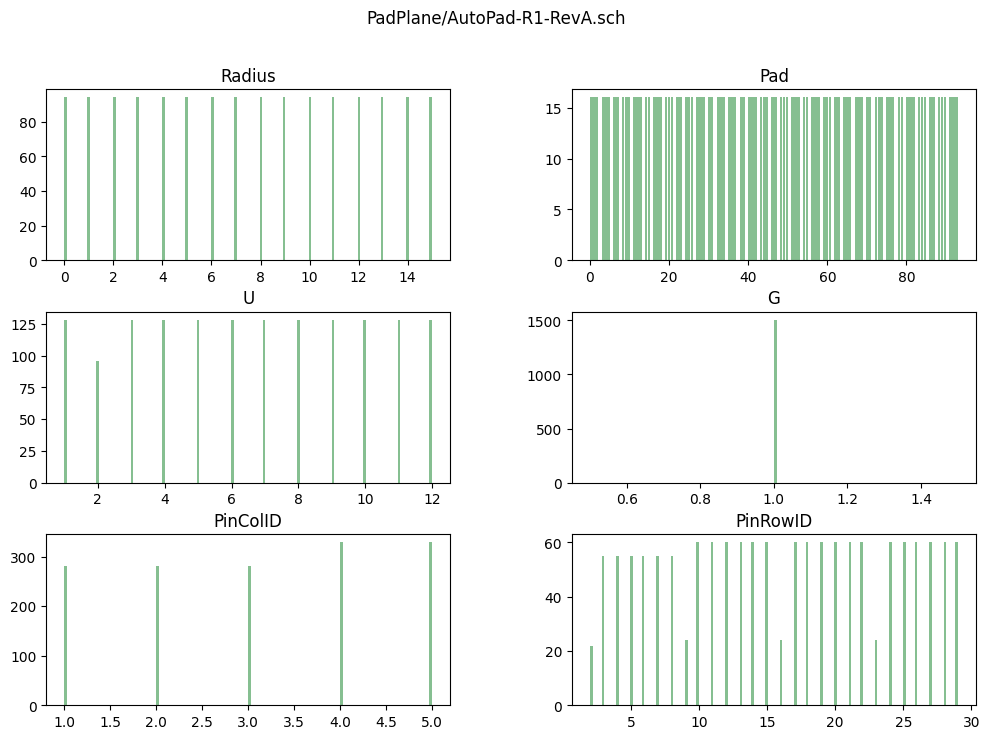

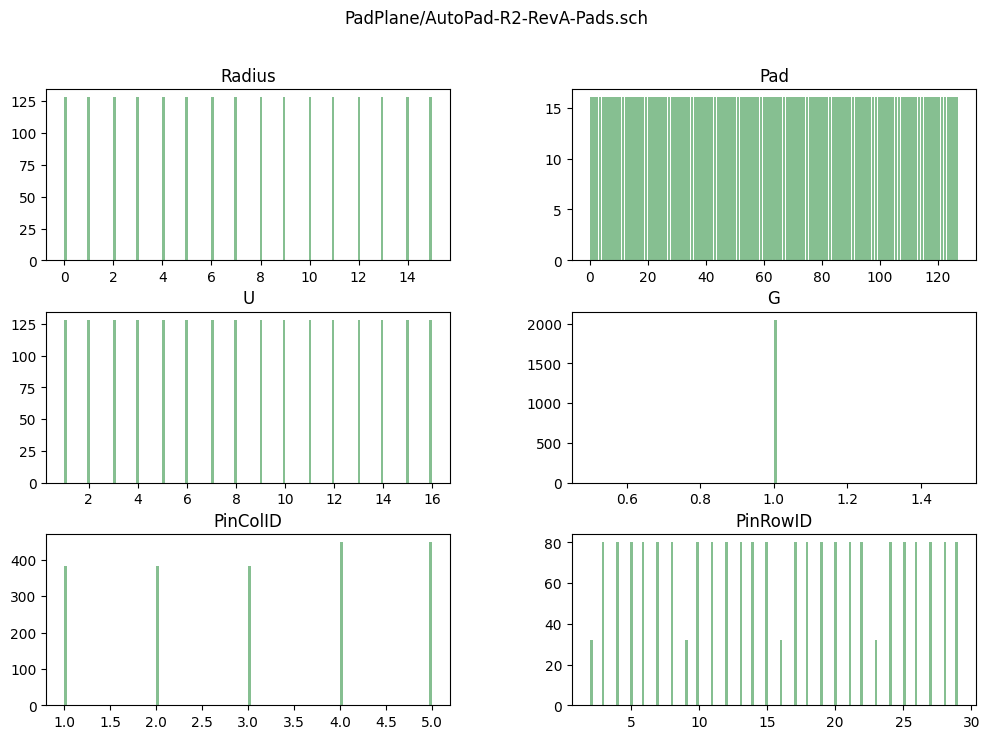

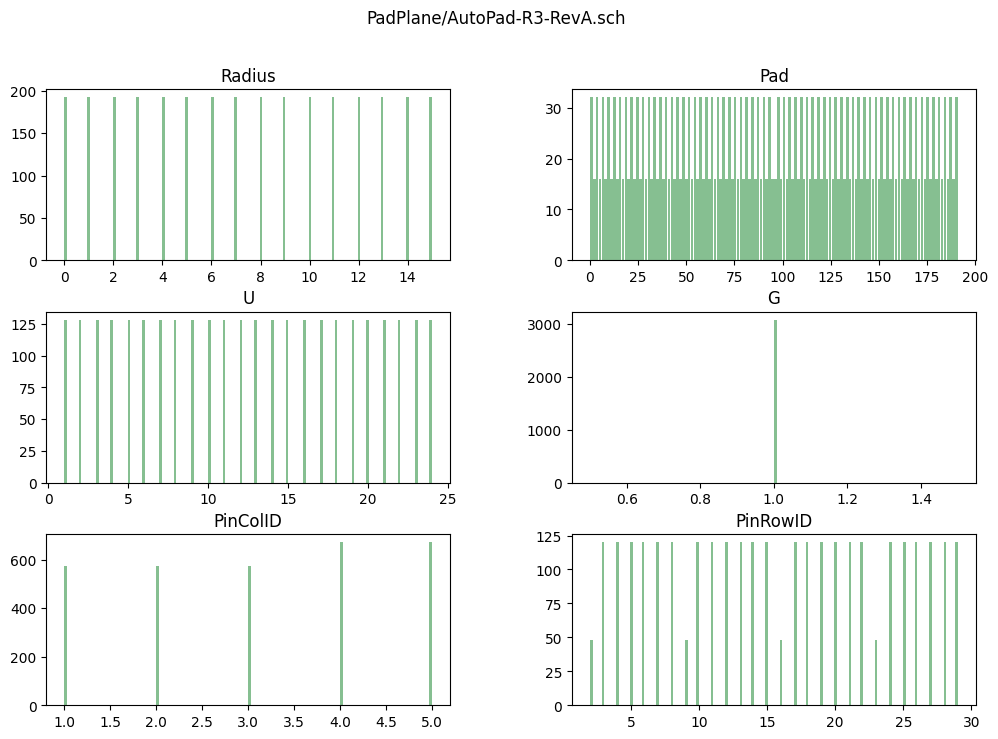

In [17]:
df_maps = []
for map in maps:
    tree = ET.parse(map)
    root = tree.getroot()
    Element=root[0]
    schematic = Element.find("schematic")
    sheets = schematic.find("sheets")
    net_dict = {'Radius': [], 'Pad': [], 'U': [], 'G': [], 'Pin': [], 'PinColID': [], 'PinRowID': [], 'PadName': [], }
    reZZ = re.compile('ZZ\.([0-9]+)\.([0-9]+)')
    repart = re.compile('U\$([0-9]+)')
    regate = re.compile('G\$([0-9]+)')
    repin = re.compile('([A-Z])([0-9]+)')
    pinColMap = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, }

    for sheet in sheets:
    # sheet = sheets.find("sheet")
        nets = sheet.find("nets")
        for net in nets:
        #     print(child.tag, child.attrib)

            name = net.attrib['name'];
            match = reZZ.search(name)

            if match:

                Radius = match.group(1) 
                Pad = match.group(2) 

                pinref = net.find("segment").find("pinref")
                #         print(pinref.tag, pinref.attrib)

                U = repart.search(pinref.attrib['part']).group(1) 
                G = regate.search(pinref.attrib['gate']).group(1) 
                PinCol = repin.search(pinref.attrib['pin']).group(1) 
                PinRow = repin.search(pinref.attrib['pin']).group(2) 


                #             print (f"  {pinref.tag} {pinref} -> U = { U }, G = { G }, Pin = { Pin }")
                #if int(U)==3 and int(Radius)==13:
                #    print(name)
                #    print (f"Found {net.attrib} -> Radius = { match.group(1) }, Pad = { match.group(2) }")
                net_dict['Radius'].append(int(Radius))
                net_dict['Pad'].append(int(Pad))
                net_dict['U'].append(int(U))
                net_dict['G'].append(int(G))
                net_dict['Pin'].append(pinref.attrib['pin'])
                net_dict['PinColID'].append(pinColMap[PinCol])
                net_dict['PinRowID'].append(int(PinRow))
                net_dict['PadName'].append(name)
    df = pd.DataFrame.from_dict(net_dict)
    df.index.name = 'ID'
    df_maps.append(df)
    print(df.head())
    # Checking that the DataFrame is filled properly
    hist = df.hist(bins=128, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
    plt.suptitle(map)


# Input FEE mapping

In [18]:
df_fee_sch_revB = pd.read_csv("PadPlane/fee_sch_revB_3-9-20.csv", header=None)
df_fee_sch_revB

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,J1,A1,NaN,B1,NaN,C1,NaN,D1,NaN,E1,NaN,F1,NaN
1,J1,A2,NaN,B2,NaN,C2,NaN,D2,NaN,E2,pad30,F2,pad31
2,J1,A3,NaN,B3,pad28,C3,pad29,D3,pad26,E3,pad27,F3,pad24
3,J1,A4,NaN,B4,pad25,C4,pad22,D4,pad23,E4,pad20,F4,pad21
4,J1,A5,NaN,B5,pad18,C5,pad19,D5,pad16,E5,pad17,F5,pad14
5,J1,A6,NaN,B6,pad15,C6,pad12,D6,pad13,E6,pad10,F6,pad11
6,J1,A7,NaN,B7,pad8,C7,pad9,D7,pad6,E7,pad7,F7,pad4
7,J1,A8,NaN,B8,pad5,C8,pad2,D8,pad3,E8,pad0,F8,pad1
8,J1,A9,NaN,B9,NaN,C9,NaN,D9,NaN,E9,pad62,F9,pad63
9,J1,A10,NaN,B10,pad60,C10,pad61,D10,pad58,E10,pad59,F10,pad56


In [19]:
fee_dict = {}

for index, row in df_fee_sch_revB.iterrows():
    connector = row[0]
    
    for col in [4, 6, 8, 10, 12]:    
        if not pd.isna(row[col]): 
            fee_dict[f"{connector}_{row[col-1].strip()}"] = int(row[col].strip().strip('pad'))
        
fee_dict

{'J1_E2': 30,
 'J1_F2': 31,
 'J1_B3': 28,
 'J1_C3': 29,
 'J1_D3': 26,
 'J1_E3': 27,
 'J1_F3': 24,
 'J1_B4': 25,
 'J1_C4': 22,
 'J1_D4': 23,
 'J1_E4': 20,
 'J1_F4': 21,
 'J1_B5': 18,
 'J1_C5': 19,
 'J1_D5': 16,
 'J1_E5': 17,
 'J1_F5': 14,
 'J1_B6': 15,
 'J1_C6': 12,
 'J1_D6': 13,
 'J1_E6': 10,
 'J1_F6': 11,
 'J1_B7': 8,
 'J1_C7': 9,
 'J1_D7': 6,
 'J1_E7': 7,
 'J1_F7': 4,
 'J1_B8': 5,
 'J1_C8': 2,
 'J1_D8': 3,
 'J1_E8': 0,
 'J1_F8': 1,
 'J1_E9': 62,
 'J1_F9': 63,
 'J1_B10': 60,
 'J1_C10': 61,
 'J1_D10': 58,
 'J1_E10': 59,
 'J1_F10': 56,
 'J1_B11': 57,
 'J1_C11': 54,
 'J1_D11': 55,
 'J1_E11': 52,
 'J1_F11': 53,
 'J1_B12': 50,
 'J1_C12': 51,
 'J1_D12': 48,
 'J1_E12': 49,
 'J1_F12': 46,
 'J1_B13': 47,
 'J1_C13': 44,
 'J1_D13': 45,
 'J1_E13': 42,
 'J1_F13': 43,
 'J1_B14': 40,
 'J1_C14': 41,
 'J1_D14': 38,
 'J1_E14': 39,
 'J1_F14': 36,
 'J1_B15': 37,
 'J1_C15': 34,
 'J1_D15': 35,
 'J1_E15': 32,
 'J1_F15': 33,
 'J1_E16': 94,
 'J1_F16': 95,
 'J1_B17': 92,
 'J1_C17': 93,
 'J1_D17': 90,
 'J1_E17'

# Finding coordinates of pad centroids

Read .brd files to get polygons from the files and find centroids

Prepare functions for the reading:

In [20]:
def get_pad_coordinates(root):
    '''Reading all the vertices of the pads from the xml ElementTree '''

    all_elements = [elem.tag for elem in root.iter()]
    all_attributes = [elem.attrib for elem in root.iter()]
    i = 0
    f_vertex = False
    all_vertices = []
    vertex_array = []
    pad_names = []
    pad_name=''
    for ele in all_elements:
        #print(ele)
        if f_vertex:
            if ele == 'vertex':
                vertex_array.append(all_attributes[i])
            else:
                #print(vertex_array)
                pad_names.append(pad_name)
                all_vertices.append(vertex_array)
                f_vertex = False
        if ele == 'signal':
            pad_name = all_attributes[i]['name']
        if ele == 'polygon':
            if all_attributes[i]['layer']=='16':
                #print(ele, all_attributes[i])
                f_vertex = True
                vertex_array = []
        i += 1

    return all_vertices, pad_names

In [21]:

def make_pad_graphs(all_vertices, all_PadNames):
    '''Creates polygons for pads'''

    # Run over all pad vertices  
    pads_xy = {
        'PadName':[],
        'PadX':[],
        'PadY':[],
        'PadR':[],
        'PadPhi':[]
    }
    n_phi=0
    n_phi_max=0
    for vx_array, padName in zip(all_vertices,all_PadNames):
        n_phi_max+=1
        x_vx = []
        y_vx = []
        r_vx = []
        phi_vx = []
        xy_vx = []

        #Each pad vertices are wrote down 
        for vx in vx_array:
            x_vx.append(float(vx['x']))
            y_vx.append(float(vx['y']))
            r = math.sqrt(float(vx['y'])**2+float(vx['x'])**2)
            if n_phi==0:
                phi = math.atan2(float(vx['y']),float(vx['x']))
                #print('{:.3f}, {:.3f}'.format(phi,math.pi/12-(math.pi/2-phi)))
            if n_phi_max==len(all_vertices):
                phi = math.atan2(float(vx['y']),float(vx['x']))
                #print('{:.3f}, {:.3f}'.format(phi,-math.pi/12-(math.pi/2-phi)))

            r_vx.append(r)
            phi_vx.append(phi)
            xy_vx.append([float(vx['x']),float(vx['y'])])
            n_phi+=1

        #Make Polygons
        polygon = Polygon(xy_vx)
        centroid =   polygon.centroid
        #Get Centroid from the Polygons
        c_x = centroid.x
        c_y = centroid.y
        c_r = math.sqrt(c_x**2+c_y**2)        
        c_phi = math.atan2(c_x,c_y)
        pads_xy['PadName'] .append(padName)
        pads_xy['PadX'] .append(c_x)
        pads_xy['PadY'] .append(c_y)
        pads_xy['PadR'] .append(c_r)
        pads_xy['PadPhi'] .append(c_phi)


    df = pd.DataFrame(data=pads_xy)
    return  df


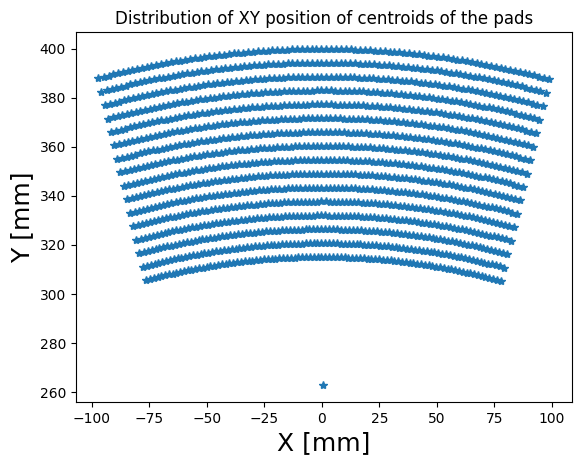

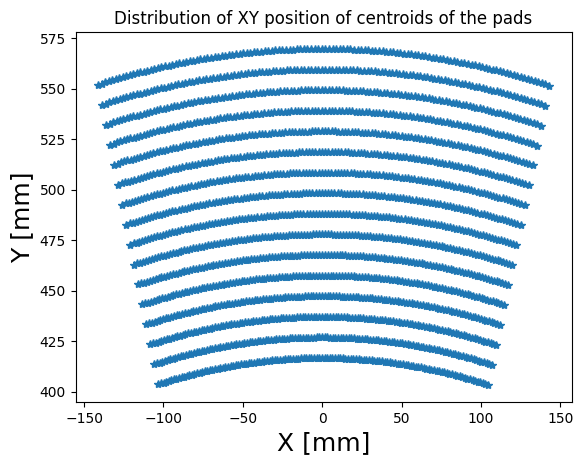

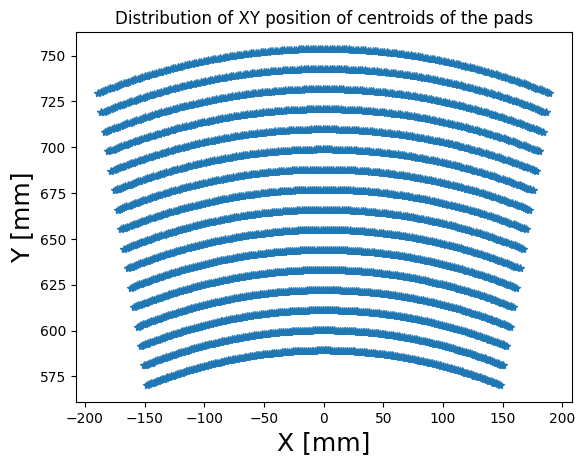

In [22]:
df_centroids = []
brd_maps = [
    'PadPlane/AutoPad-R1-RevA.brd',
    'PadPlane/AutoPad-R2-RevA-Pads.brd',
    'PadPlane/AutoPad-R3-RevA.brd',
]
for brd_map in brd_maps:
    tree_R = ET.parse(brd_map)
    root_R = tree_R.getroot()
    # Get all pad vertices
    all_vertices_R, all_PadNames_R = get_pad_coordinates(tree_R)

    #Get centroids of the polygons
    df_centroids_R = make_pad_graphs(all_vertices_R, all_PadNames_R)
    df_centroids.append(df_centroids_R)

    # Plot centroid distribution
    plt.plot(df_centroids_R['PadX'], df_centroids_R['PadY'],'*')
    plt.title(f'Distribution of XY position of centroids of the pads')
    plt.xlabel('X [mm]', fontsize = 18)
    plt.ylabel('Y [mm]', fontsize = 18)    
    plt.show()


# Matching padplane and FEE

Now process the map to FFEs. Note the J1/J2 on FEE map to U2/U1. And FEE counting 0 is on the high U index side

    Radius  Pad  U  G Pin  PinColID  PinRowID    PadName  FEE FEE_Connector  \
ID                                                                            
0        2    1  1  1  B3         1         3  ZZ.02.001  5.0            J2   
1        0    1  1  1  B4         1         4  ZZ.00.001  5.0            J2   
2        1    0  1  1  B5         1         5  ZZ.01.000  5.0            J2   
3       10    0  1  1  B6         1         6  ZZ.10.000  5.0            J2   
4        8    0  1  1  B7         1         7  ZZ.08.000  5.0            J2   

    FEE_Chan  
ID            
0        156  
1        153  
2        146  
3        143  
4        136  
94


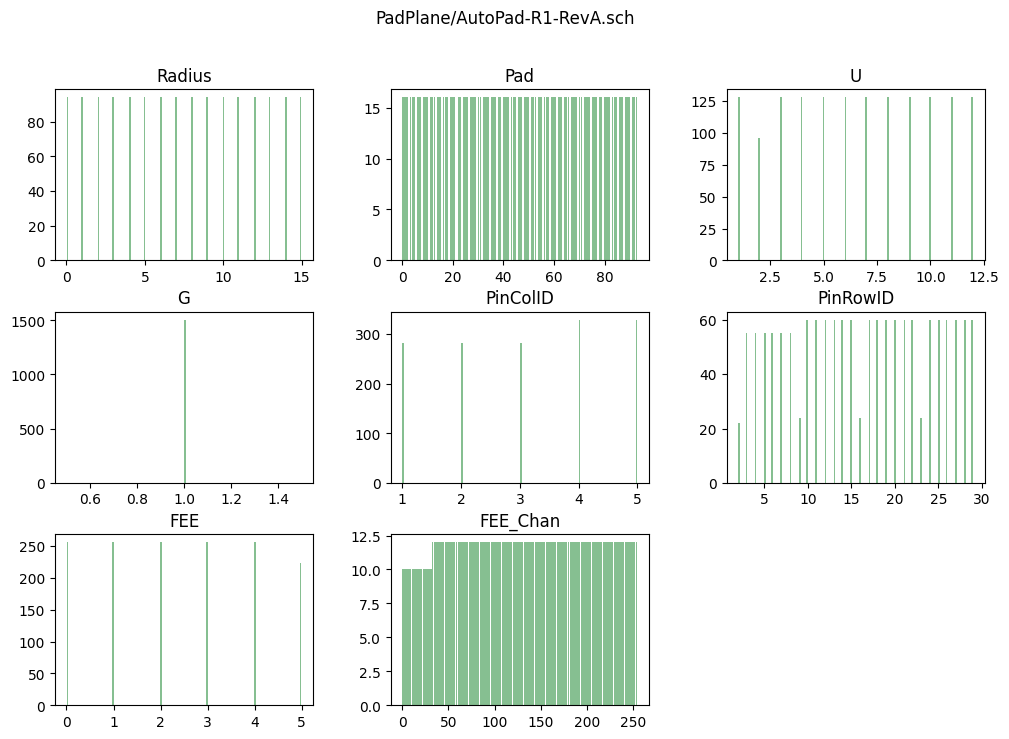

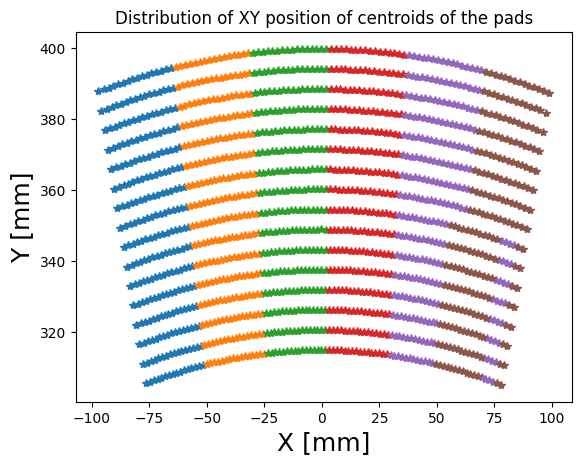

    Radius  Pad  U  G Pin  PinColID  PinRowID    PadName  FEE FEE_Connector  \
ID                                                                            
0        9   12  1  1  B3         1         3  ZZ.09.012  7.0            J2   
1        8   12  1  1  B4         1         4  ZZ.08.012  7.0            J2   
2        8    8  1  1  B5         1         5  ZZ.08.008  7.0            J2   
3        8    5  1  1  B6         1         6  ZZ.08.005  7.0            J2   
4        9    2  1  1  B7         1         7  ZZ.09.002  7.0            J2   

    FEE_Chan  
ID            
0        156  
1        153  
2        146  
3        143  
4        136  
128


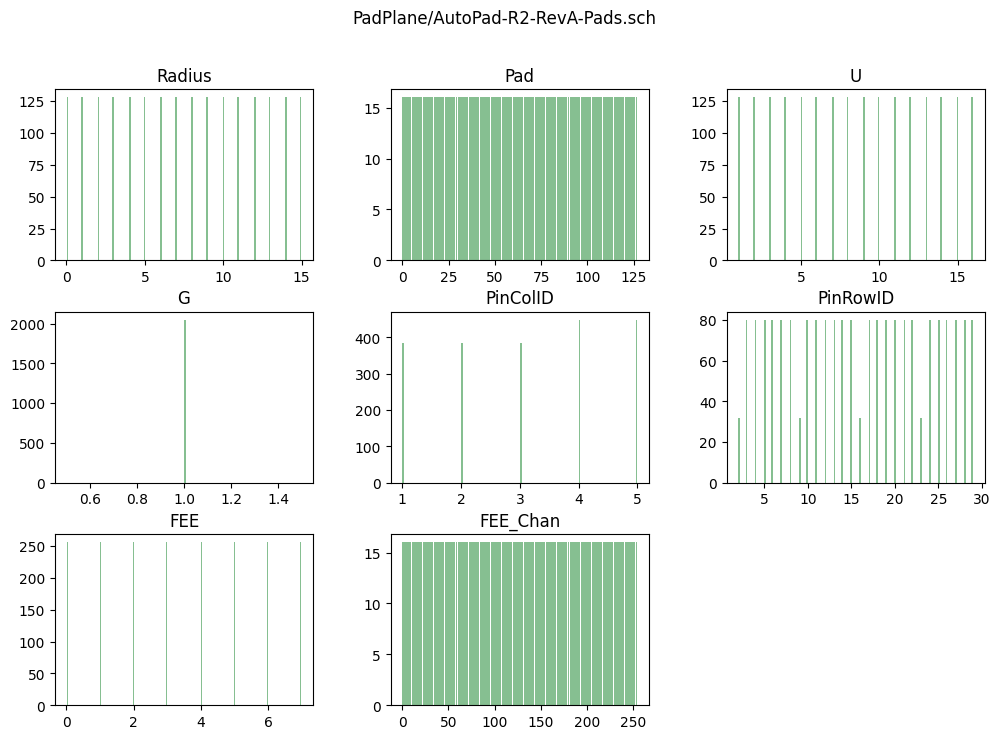

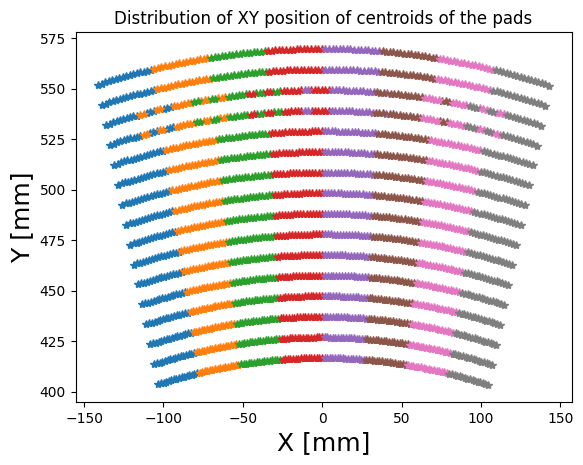

    Radius  Pad  U  G Pin  PinColID  PinRowID    PadName   FEE FEE_Connector  \
ID                                                                             
0        8   10  1  1  B3         1         3  ZZ.08.010  11.0            J2   
1        8    5  1  1  B4         1         4  ZZ.08.005  11.0            J2   
2        8    0  1  1  B5         1         5  ZZ.08.000  11.0            J2   
3        9    0  1  1  B6         1         6  ZZ.09.000  11.0            J2   
4        9    6  1  1  B7         1         7  ZZ.09.006  11.0            J2   

    FEE_Chan  
ID            
0        156  
1        153  
2        146  
3        143  
4        136  
192


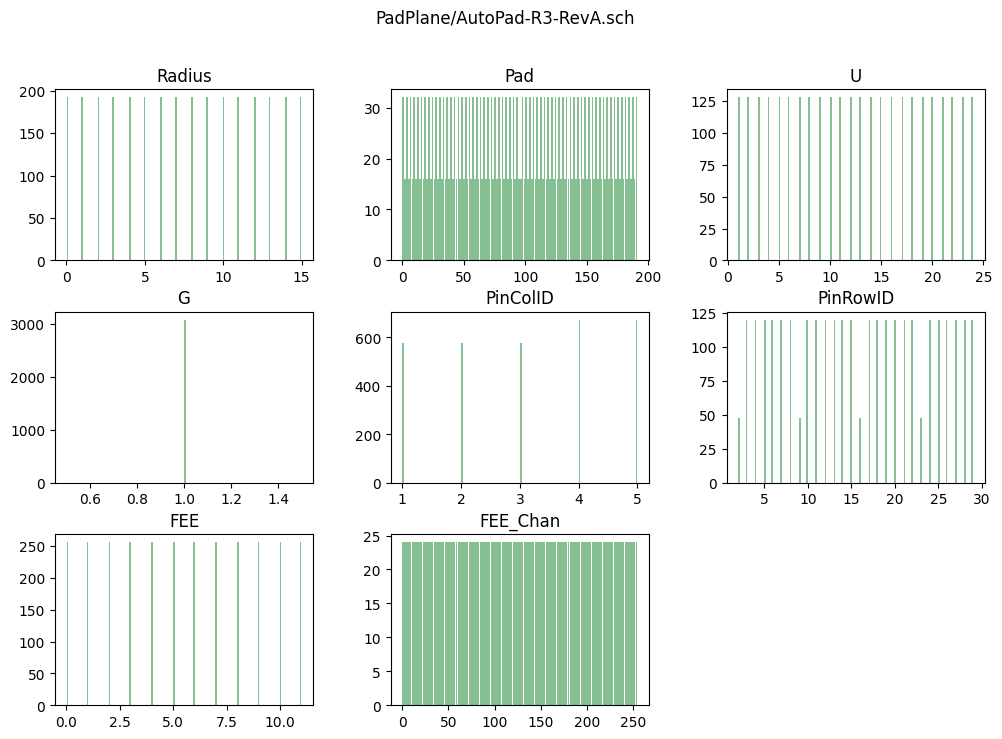

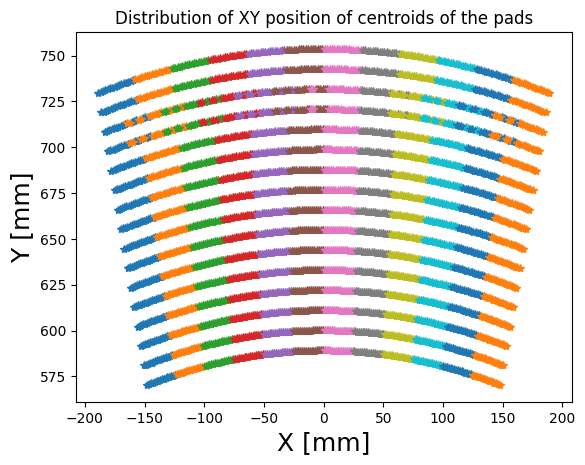

In [23]:
df_maps_fin = []
for map, df, df_centroid in zip(maps, df_maps, df_centroids):
    df_processed = df.copy()

    max_number_fee = df_processed['U'].max() / 2;

    df_processed['FEE'] = df_processed.apply(lambda x: max_number_fee -1 - int ((x['U'] - 1) / 2) , axis=1)
    df_processed['FEE_Connector'] = df_processed.apply(lambda x: f"J{(1-((x['U'] - 1) %  2)) + 1}" , axis=1) 
    df_processed['FEE_Chan'] = df_processed.apply(lambda x: fee_dict[f"{x['FEE_Connector']}_{x['Pin']}"] , axis=1)
        
    # df_processed['SAMPA'] = df_processed.apply(lambda x:  ((x['U'] - 1) %  2) *4 +  + pinRowSampaMap[x['PinRowID']], axis=1)
    print(df_processed.head())

    # R1 has a special SAMPA for sensing pads
    #if map == 'PadPlane/AutoPad-R1-RevA.sch':
    #    for i in range (0,32):
    #        df_processed.loc[len(df_processed.index)] = [-1,i,0,0,"",0,0,5,"J1",i]
            
    # Checking that the DataFrame is filled properly
    hist = df_processed.hist(bins=128, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
    plt.suptitle(map)


    # Drawing approximate positions of the pads
    df_processed['phi'] = (df_processed['Pad']+1)*(math.pi/6)/(max(df_processed['Pad']+1))
    #df_processed['phi'] = (df_processed['Pad']+1)*math.pi/(max(df_processed['Pad']+1))
    df_processed['x'] = [r*math.cos(phi) for r, phi in zip(df_processed['Radius']+70,df_processed['phi'])]
    df_processed['y'] = [r*math.sin(phi) for r, phi in zip(df_processed['Radius']+70,df_processed['phi'])]
    print(max(df_processed['Pad'])+1)
    for i in range(0,1+int(max(df_processed['FEE']))):
        df_processed_plot = df_processed[df_processed['FEE'] == i]
        plt.plot(df_processed_plot['x'], df_processed_plot['y'],'*')
    plt.title(f'Approximate XY distribution of pads')
    plt.xlabel('X [mm]', fontsize = 18)
    plt.ylabel('Y [mm]', fontsize = 18)
    plt.show()

    # Merge Data Frames from both files using PadName
    df_processed = pd.merge(df_processed, df_centroid, on='PadName')
    df_maps_fin.append(df_processed)
    # Sort wrt 'Radius' & 'Pad'
    df_processed = df_processed.sort_values(by=['Radius', 'Pad'])

    # Plot centroids
    for i in range(0,1+int(max(df_processed['FEE']))):
        df_processed_plot = df_processed[df_processed['FEE'] == i]
        plt.plot(df_processed_plot['PadX'], df_processed_plot['PadY'],'*')
    plt.title(f'Distribution of XY position of centroids of the pads')
    plt.xlabel('X [mm]', fontsize = 18)
    plt.ylabel('Y [mm]', fontsize = 18)
    plt.show()

    # Save CSV file
    df_processed.to_csv(f"{map}.ChannelMapping.csv")



## Showing all FEEs with different colors

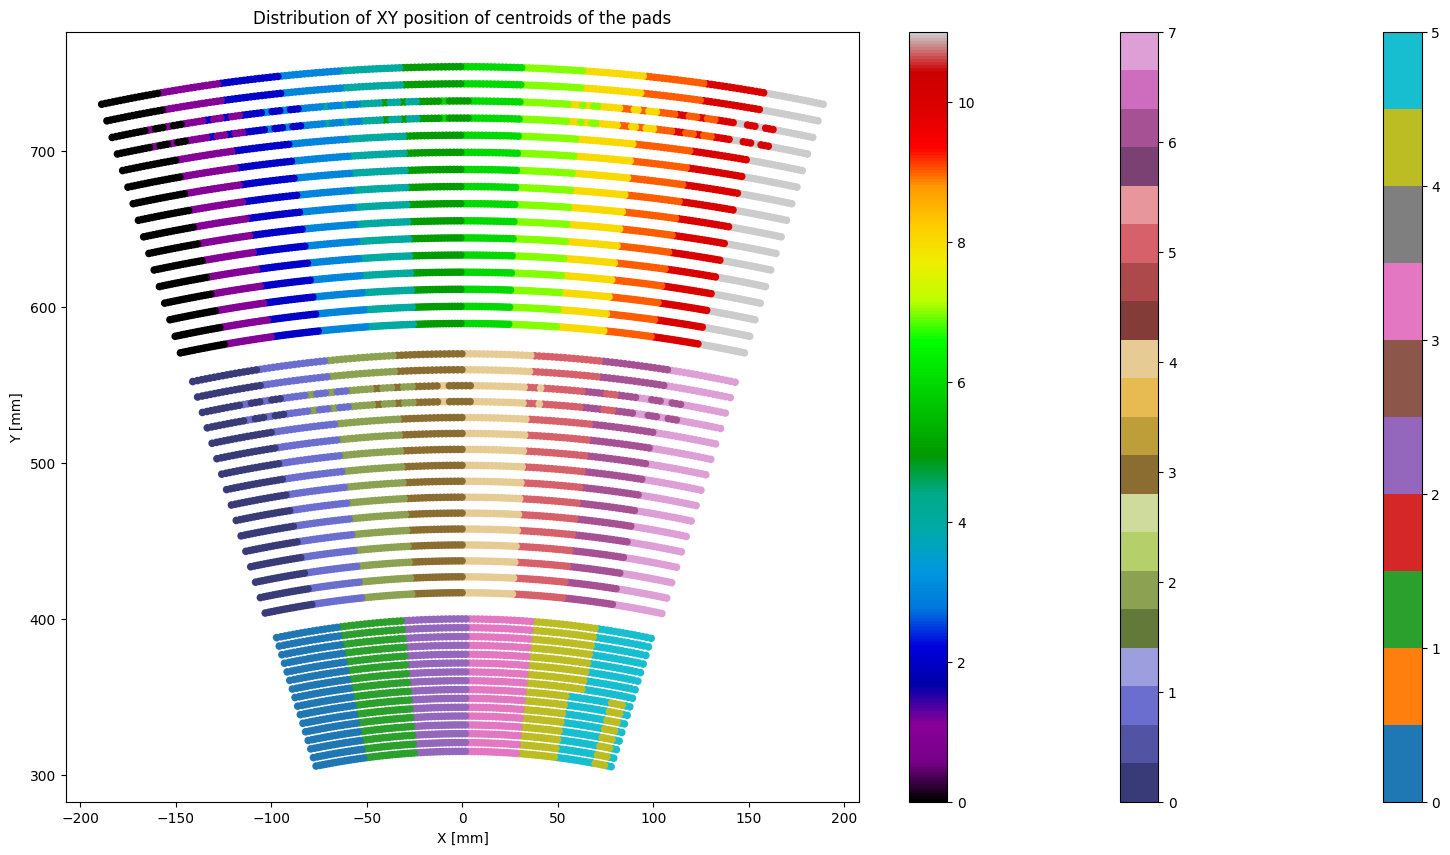

In [24]:
fig, ax = plt.subplots(figsize=(20,10))
col_maps = ['tab10', 'tab20b', 'nipy_spectral']
for df, col_map in zip(df_maps_fin,col_maps):
    df.plot.scatter(ax=ax, x='PadX', y='PadY', c=df['FEE'], colormap=col_map)

ax.set(title='Distribution of XY position of centroids of the pads', xlabel='X [mm]', 
       ylabel='Y [mm]');
plt.show()


## Showing separate FEE connectors

<AxesSubplot: xlabel='PadX', ylabel='PadY'>

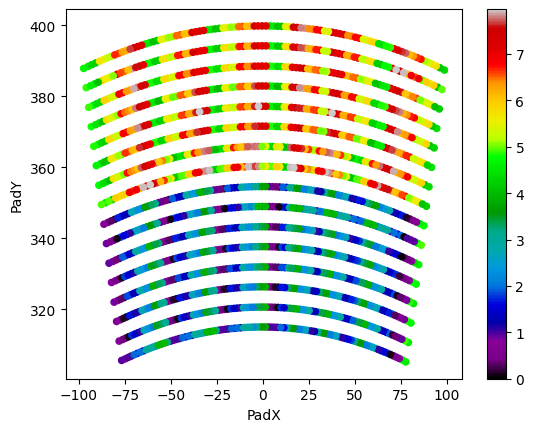

In [25]:
df_maps_fin[0].plot.scatter( x='PadX', y='PadY', c=df_maps_fin[0]['FEE_Chan']/32, colormap='nipy_spectral')

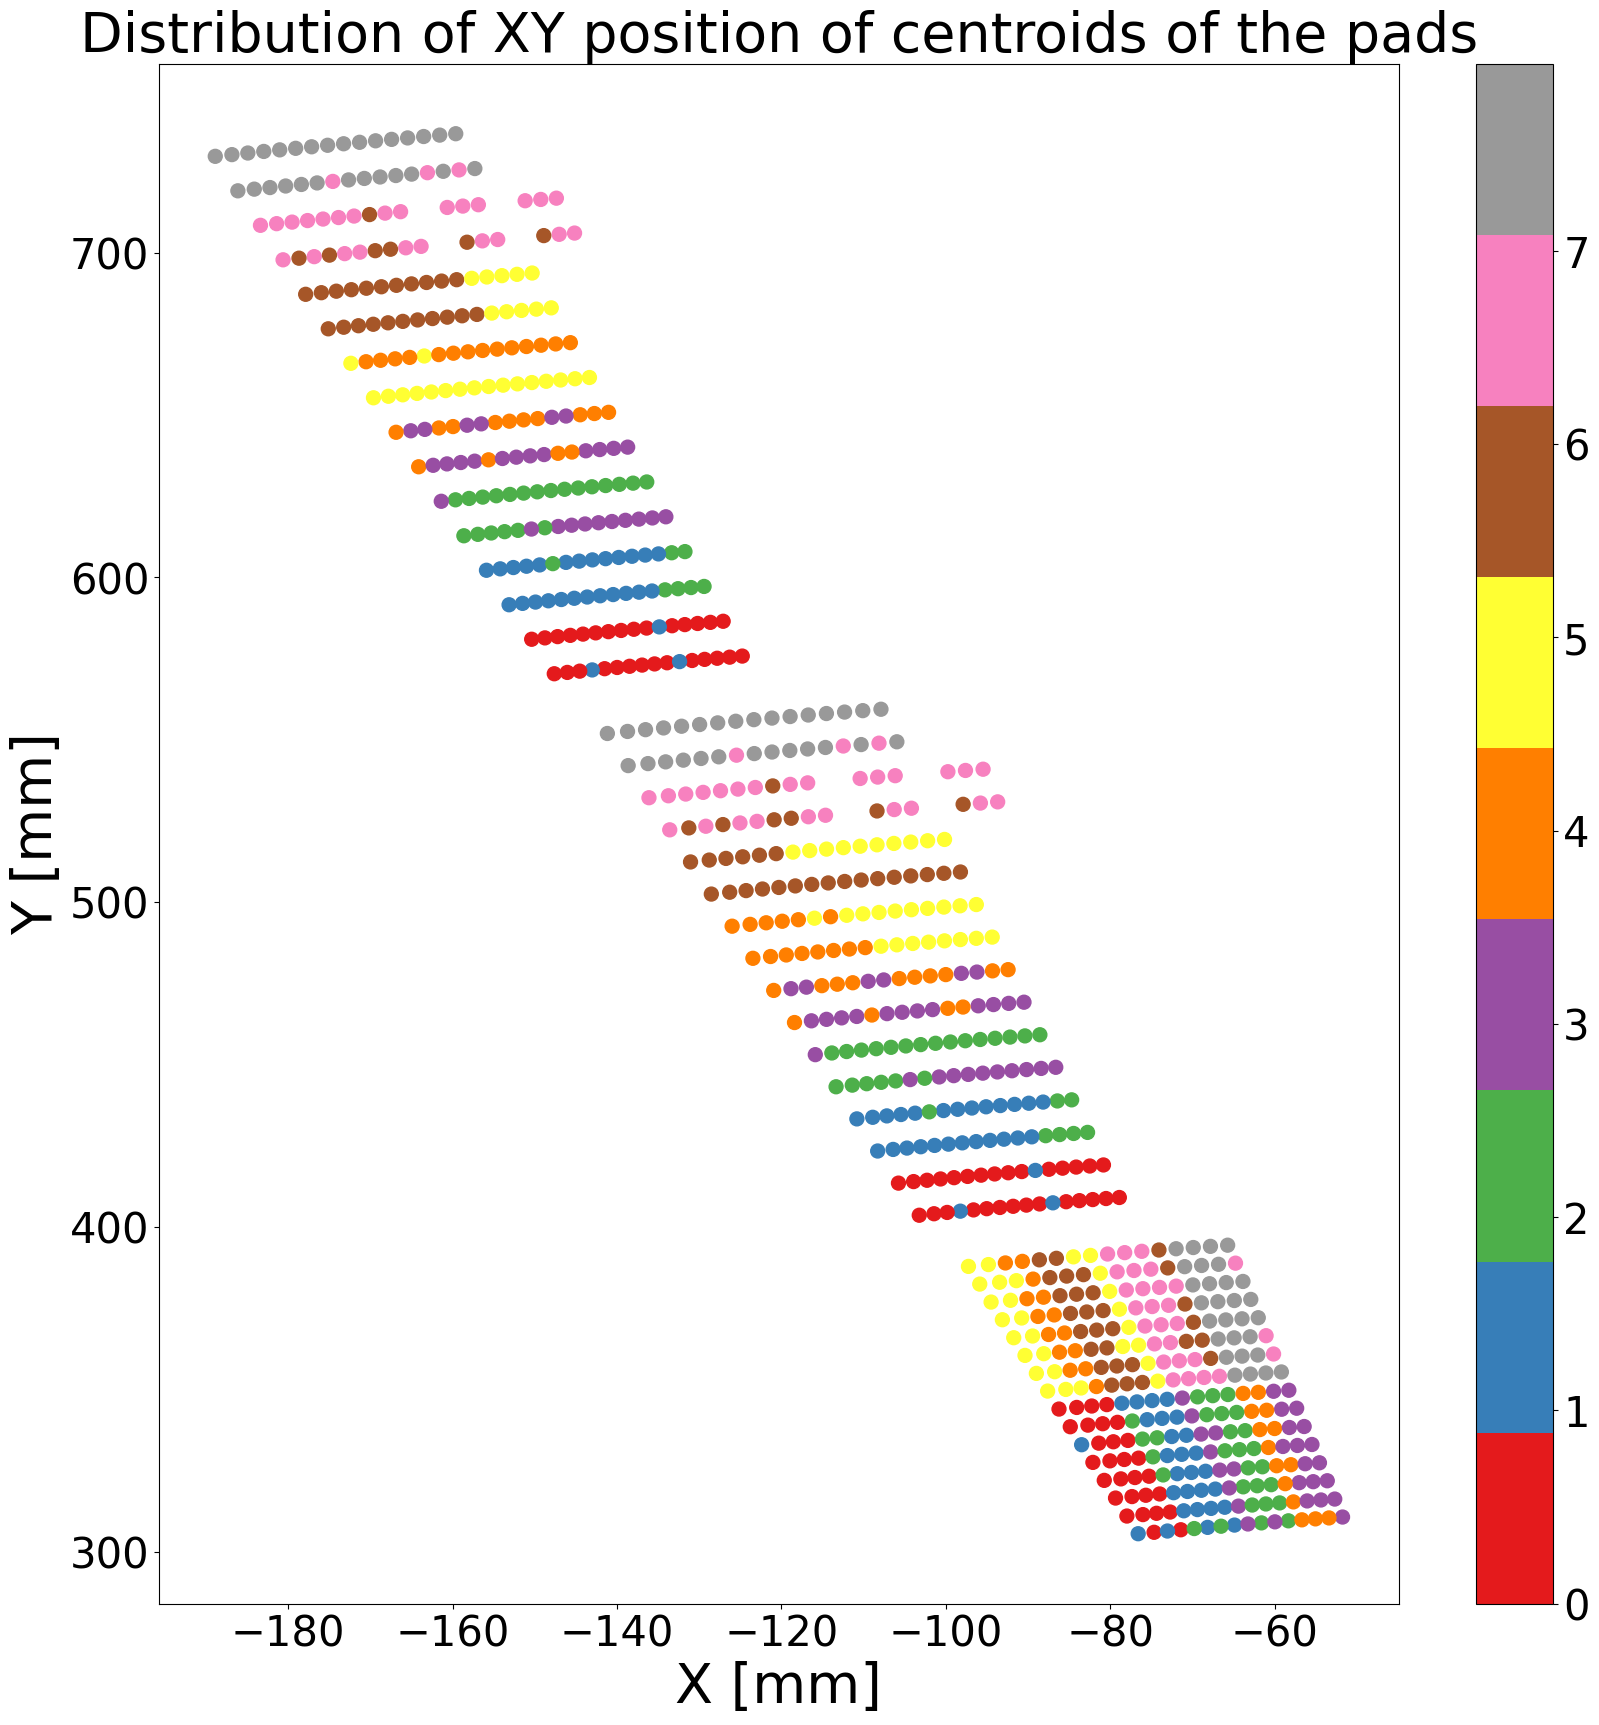

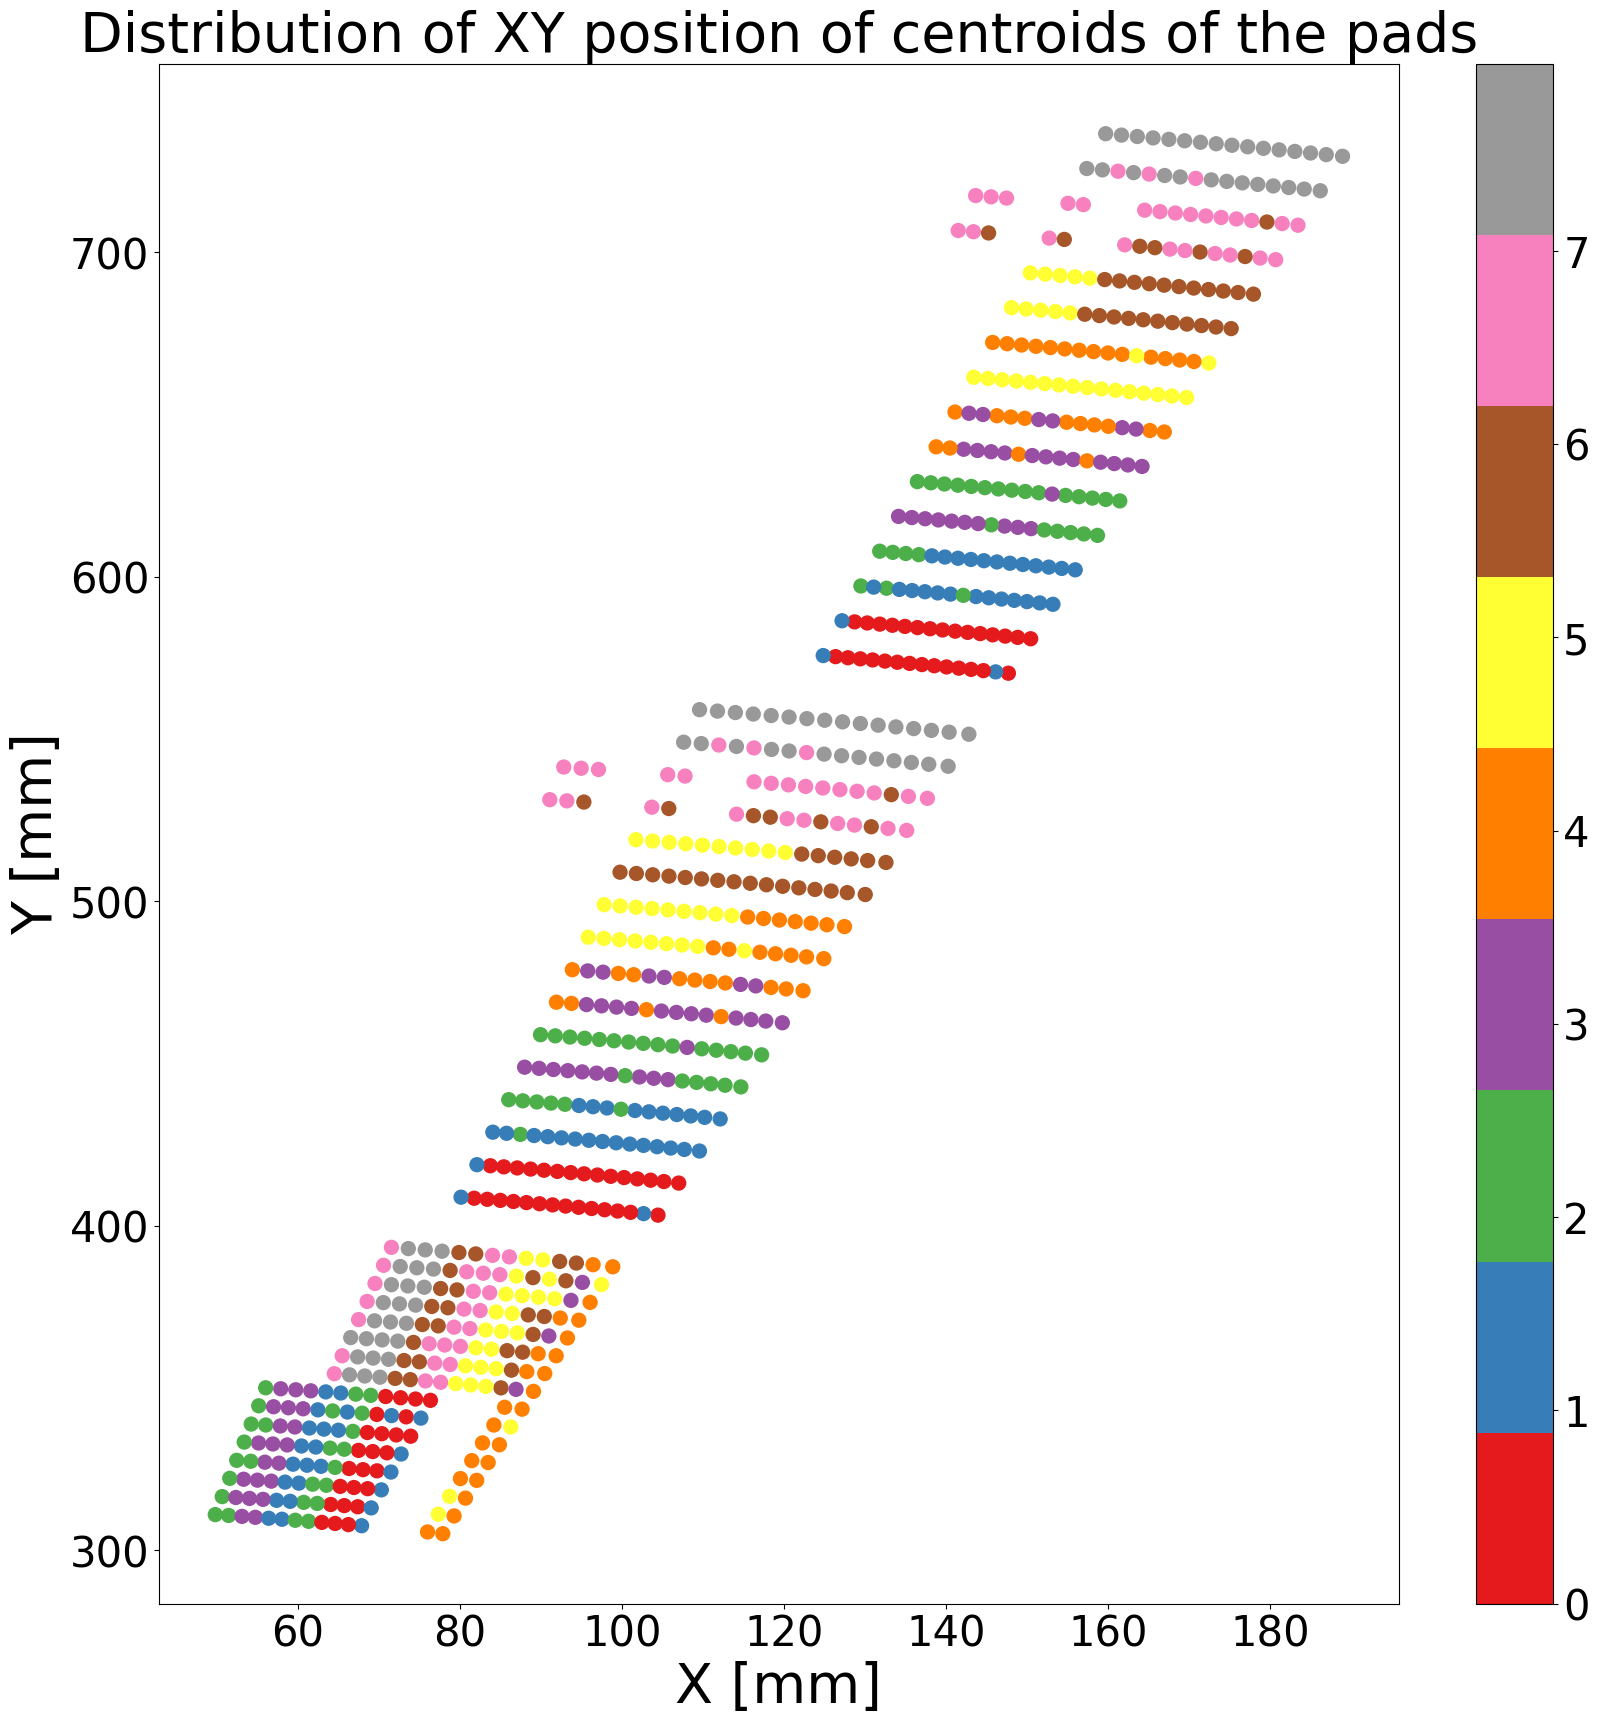

In [26]:
def plot_FEEs(df_maps, n):
    '''Plot FEEs where n is order of the FEE if negative - counting from the end'''
    fig, ax = plt.subplots(figsize=(20,20))
    col_maps = ['tab10', 'tab20b', 'nipy_spectral']
    for df in df_maps:
        #if n>0:
        #    print(int(max(df['FEE'])))
        df_plot = df[df['FEE'] == n]
        if n<0:
            #print(int(max(df['FEE'])+1+n))
            df_plot = df[df['FEE'] == int(max(df['FEE'])+1+n)]
        im=ax.scatter(df_plot['PadX'], df_plot['PadY'], c=df_plot['FEE_Chan']/32, cmap='Set1', marker='o', s=100)
    fig.colorbar(im, ax=ax)
    ax.figure.axes[0].tick_params(labelsize=30)
    ax.figure.axes[1].tick_params(labelsize=30)

    plt.title(f'Distribution of XY position of centroids of the pads', fontsize = 40)
    plt.xlabel('X [mm]', fontsize = 40)
    plt.ylabel('Y [mm]', fontsize = 40)

    plt.show()

# Showing separate FEEs
plot_FEEs(df_maps_fin, 0)
plot_FEEs(df_maps_fin, -1)
#plot_FEEs(df_maps_fin, 1)
#plot_FEEs(df_maps_fin, 2)
#plot_FEEs(df_maps_fin, -3)
#plot_FEEs(df_maps_fin, -2)
